In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read invivo/exvivo results

In [3]:
IPA_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/IPA_results/'

In [4]:
## read in vivo regulons
ipa = pd.read_csv(IPA_dir + 'IPA_conserved_pathways_Macrophages.csv', sep = ',')
ipa

,IPA canonical pathways,invivo,exvivo
0,Differential Regulation of Cytokine Production...,2.000,2.828
1,Differential Regulation of Cytokine Production...,2.000,2.646
2,Tumor Microenvironment Pathway,1.807,0.926
3,Type I Diabetes Mellitus Signaling,1.633,2.324
4,"PD-1, PD-L1 cancer immunotherapy pathway",1.342,1.400
...,...,...,...
194,Endothelin-1 Signaling,-2.668,-2.353
195,FGF Signaling,-2.714,-2.840
196,Insulin Secretion Signaling Pathway,-2.837,-2.530
197,Thrombin Signaling,-2.840,-1.000


In [5]:
ipa.sort_values(by = 'invivo', ascending = False).head(25)

,IPA canonical pathways,invivo,exvivo
0,Differential Regulation of Cytokine Production...,2.000,2.828
1,Differential Regulation of Cytokine Production...,2.000,2.646
2,Tumor Microenvironment Pathway,1.807,0.926
3,Type I Diabetes Mellitus Signaling,1.633,2.324
4,"PD-1, PD-L1 cancer immunotherapy pathway",1.342,1.400
6,Th2 Pathway,1.000,1.800
7,Cardiac β-adrenergic Signaling,1.000,1.886
8,TREM1 Signaling,1.000,2.294
9,Crosstalk between Dendritic Cells and Natural ...,1.000,0.500
5,Acute Phase Response Signaling,1.000,0.707


In [6]:
pathways = ['Differential Regulation of Cytokine Production in Macrophages and T Helper Cells by IL-17A and IL-17F',
            'Tumor Microenvironment Pathway',
            'PD-1, PD-L1 cancer immunotherapy pathway',
            'Acute Phase Response Signaling',
            'TREM1 Signaling',
            'iNOS Signaling',
            'NF-κB Activation by Viruses',
            'IL-1 Signaling',
            'Toll-like Receptor Signaling',
            'TNFR1 Signaling',
            'CXCR4 Signaling',
            'Thrombin Signaling',
            'FGF Signaling',
            'Endothelin-1 Signaling',
            'Integrin Signaling',
            'HGF Signaling',
            'Ephrin Receptor Signaling',
            'Angiopoietin Signaling',
            'fMLP Signaling in Neutrophils',
            'Ferroptosis Signaling Pathway',
            'EGF Signaling'
]

In [7]:
ipa = ipa[ipa['IPA canonical pathways'].isin(pathways)]

In [8]:
conserved_invivo = ipa[['IPA canonical pathways','invivo']]
conserved_invivo = conserved_invivo.sort_values(by = 'invivo', ascending = False)
conserved_invivo.rename(columns = {'invivo':'z-score'}, inplace = True)
conserved_invivo['condition'] = 'invivo'
conserved_exvivo = ipa[['IPA canonical pathways','exvivo']]
conserved_exvivo.rename(columns = {'exvivo':'z-score'}, inplace = True)
conserved_exvivo['condition'] = 'exvivo'

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
conserved_induced = pd.concat([conserved_invivo, conserved_exvivo], axis=0)

In [10]:
conserved_induced

,IPA canonical pathways,z-score,condition
1,Differential Regulation of Cytokine Production...,2.000,invivo
2,Tumor Microenvironment Pathway,1.807,invivo
4,"PD-1, PD-L1 cancer immunotherapy pathway",1.342,invivo
5,Acute Phase Response Signaling,1.000,invivo
8,TREM1 Signaling,1.000,invivo
11,iNOS Signaling,0.816,invivo
12,NF-κB Activation by Viruses,0.816,invivo
13,IL-1 Signaling,0.816,invivo
19,Toll-like Receptor Signaling,0.378,invivo
20,TNFR1 Signaling,0.378,invivo


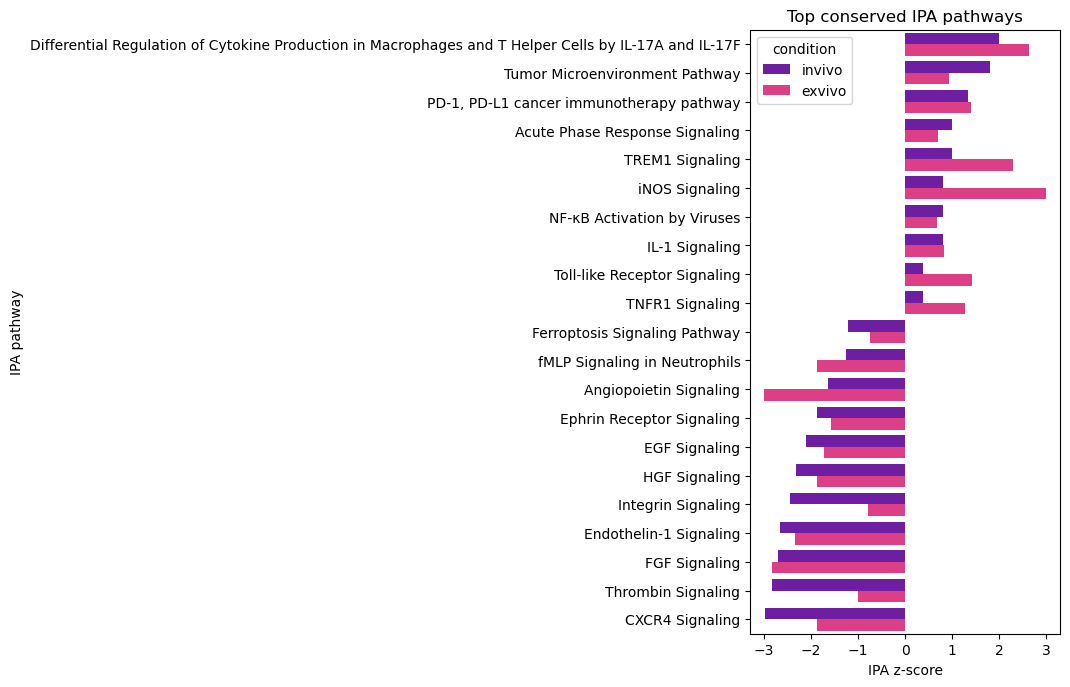

In [11]:
sb.barplot(data = conserved_induced,
           x = 'z-score',
           y = 'IPA canonical pathways',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved IPA pathways',
                xlabel = 'IPA z-score',
                ylabel = 'IPA pathway',
                #xlim = (-1.5,2)
               )
plt.savefig(fig_dir + 'barplot_Macrophages_IPA_conserved_pathway.pdf')
plt.show()